In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [3]:
# Load the dataset
data = pd.read_csv("C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/optimized_dataset.csv")
data.head()


,Weekly_Sales_Log_Standardized,CPI_Log_Standardized,Store_Standardized,Dept_Standardized,Temperature_Standardized,Fuel_Price_Standardized,MarkDown1_Standardized,MarkDown4_Standardized
0,0.877474,1.020494,-1.950537,-1.913804,-1.000331,-1.653971,-0.740193,-0.679922
1,1.362127,1.023284,-1.950537,-1.913804,-1.192331,-1.653971,-0.740193,-0.679922
2,1.278926,1.024182,-1.950537,-1.913804,-1.121142,-1.653971,-0.740193,-0.679922
3,0.692145,1.024765,-1.950537,-1.913804,-0.776476,-1.653971,-0.740193,-0.679922
4,0.778401,1.025348,-1.950537,-1.913804,-0.783295,-1.576265,-0.740193,-0.679922


In [4]:
# Assuming 'Weekly_Sales' as the target variable
X = data.drop('Weekly_Sales_Log_Standardized', axis=1)  # Özellikler
y = data['Weekly_Sales_Log_Standardized']  # Hedef değişken


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Modeli derleyin
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitin
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 0.9030 - val_loss: 0.7187
Epoch 2/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.7109 - val_loss: 0.6489
Epoch 3/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.6595 - val_loss: 0.5902
Epoch 4/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.6120 - val_loss: 0.5258
Epoch 5/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.5573 - val_loss: 0.4599
Epoch 6/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - loss: 0.5076 - val_loss: 0.4311
Epoch 7/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.4752 - val_loss: 0.4473
Epoch 8/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.4510 - val_loss: 0.3882
Epoch 9/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.4307 - val_loss: 0.3901
Epoch 10/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.4178 - val_loss: 0.3667
Epoch 11/20
10540/10540 ━━━━━━━━━━━━━━━━━━━━ 47s 4ms/step - loss: 0.4040 - val_loss: 0.34

In [7]:
# Test verisiyle tahmin yapın
y_pred = model.predict(X_test)

# Performans metrikleri
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


2635/2635 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Mean Absolute Error: 0.3542971044912767
Mean Squared Error: 0.2475029693468409
R-squared: 0.7519595955796984


# Model Development for Weekly Sales Forecasting

## Step 1: Import Libraries
In this step, we import all necessary libraries for data manipulation, model building, and evaluation.

## Step 2: Load and Inspect the Dataset
We load the optimized dataset that has been preprocessed in previous steps.

## Step 3: Feature and Target Separation
Separate the target variable (Weekly Sales) from the input features.

## Step 4: Train-Test Split
Split the data into training and testing sets to evaluate model performance later.

## Step 5: Model Building and Training
Build an LSTM model for time series forecasting and train it with the training data.

## Step 6: Model Evaluation
Evaluate the model’s performance on the test set using metrics like MAE, MSE, and R-squared.


In [8]:
original_data = pd.read_csv("C:/Users/egeme/OneDrive/Masaüstü/NeWProjectS/Walmart-LSTMmodel/Data/test.csv", parse_dates=["Date"])
data = data.merge(original_data[['Date']], left_index=True, right_index=True)


In [9]:
data['Date'] = pd.to_datetime(data['Date'])



In [10]:
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek



Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


En İyi LSTM Parametreleri:  {'model__units': 32, 'model__optimizer': 'adam', 'model__dropout_rate': 0.1, 'batch_size': 32}
LSTM Model Performansı
Ortalama Mutlak Hata (MAE): 0.5806976652599218
Ortalama Kare Hata (MSE): 0.5546837580437869
R-Karesi: 0.44411178567417964

Random Forest Model Performansı
Ortalama Mutlak Hata (MAE): 0.33766287753190016
Ortalama Kare Hata (MSE): 0.21778249065871627
R-Karesi: 0.7817446101709242


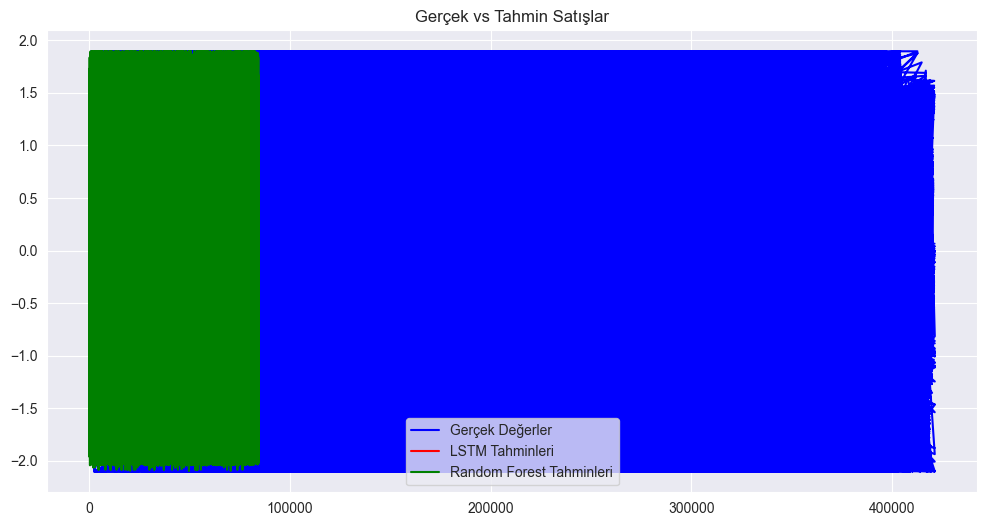

In [11]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# LSTM modeli oluşturma fonksiyonu, parametrelerle daha geniş bir model yapılandırması sağlanıyor
def create_model(units=32, dropout_rate=0.1, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# KerasRegressor ile LSTM modelini sarmalıyoruz ve EarlyStopping ile eğitim sürecini durdurma koşulu ekliyoruz
model = KerasRegressor(model=create_model, epochs=5, batch_size=32, verbose=0,
                       callbacks=[EarlyStopping(monitor='loss', patience=2)])

# Hiperparametre aralığını daha daraltılmış şekilde tanımlıyoruz
param_grid = {
    'model__units': [16, 32],
    'model__dropout_rate': [0.1],
    'model__optimizer': ['adam'],
    'batch_size': [32]
}

# Hızlı arama için RandomizedSearchCV kullanarak LSTM modelinde en iyi parametreleri buluyoruz
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_iter=2, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En İyi LSTM Parametreleri: ", grid_result.best_params_)

# En iyi LSTM modelini kullanarak tahmin yapıyoruz
y_pred_lstm = grid_result.best_estimator_.predict(X_test)

# LSTM Model Performans Metriği
print("LSTM Model Performansı")
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y_test, y_pred_lstm))
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, y_pred_lstm))
print("R-Karesi:", r2_score(y_test, y_pred_lstm))

# RandomForest modelini oluştur ve eğit
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# RandomForest modeli ile tahmin yap
y_pred_rf = rf_model.predict(X_test)

# RandomForest Model Performans Metriği
print("\nRandom Forest Model Performansı")
print("Ortalama Mutlak Hata (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("Ortalama Kare Hata (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-Karesi:", r2_score(y_test, y_pred_rf))

# Model tahminlerini görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Gerçek Değerler')
plt.plot(y_pred_lstm, color='red', label='LSTM Tahminleri')
plt.plot(y_pred_rf, color='green', label='Random Forest Tahminleri')
plt.title("Gerçek vs Tahmin Satışlar")
plt.legend()
plt.show()



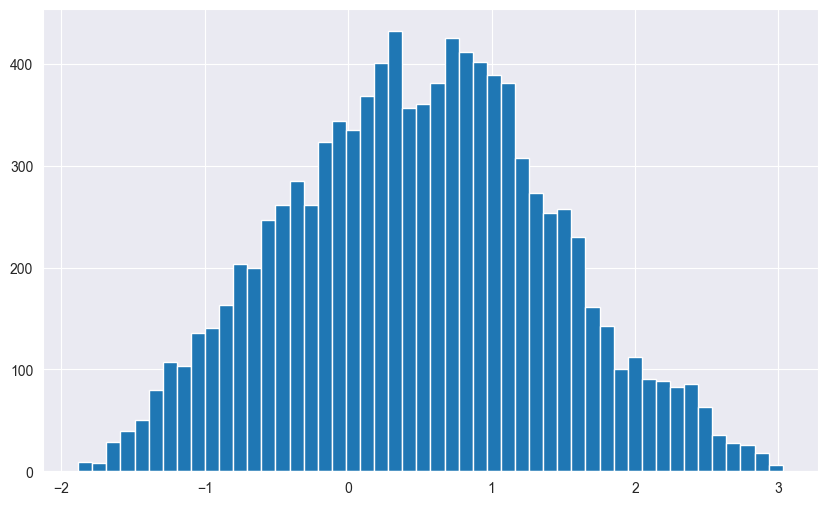

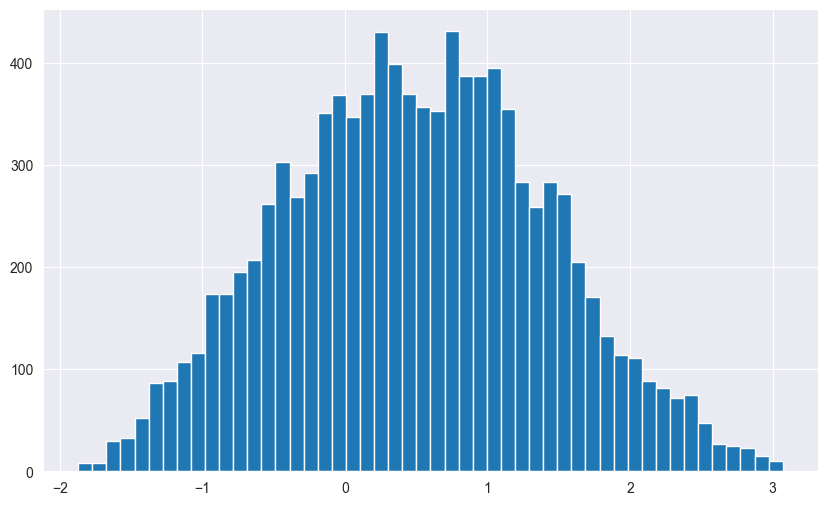

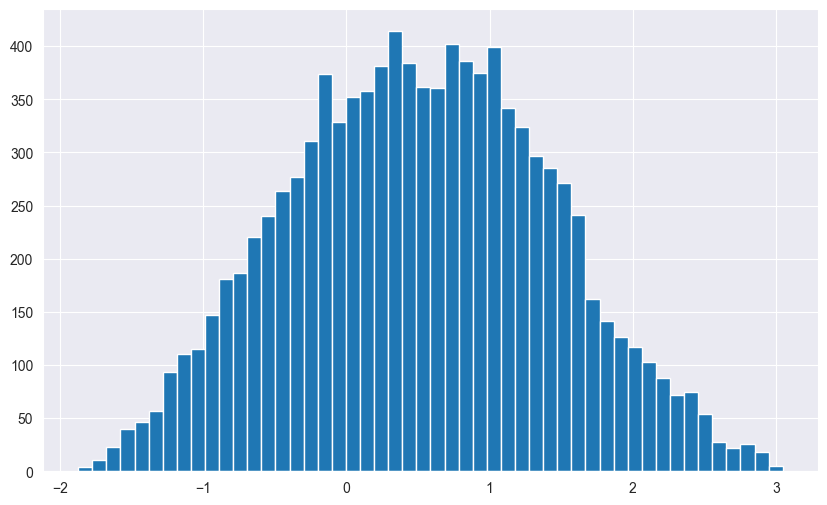

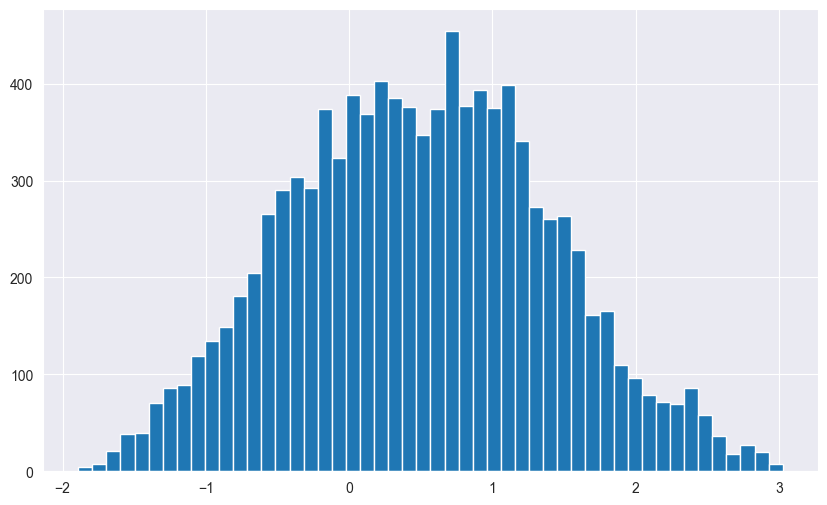

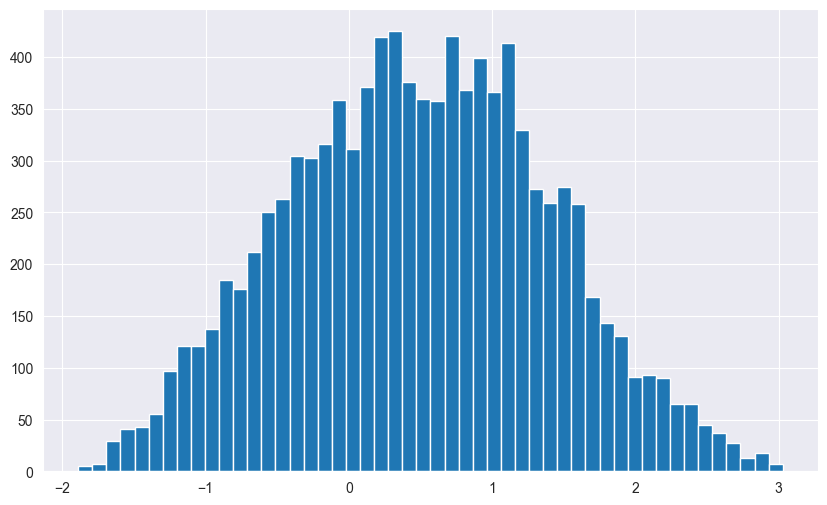

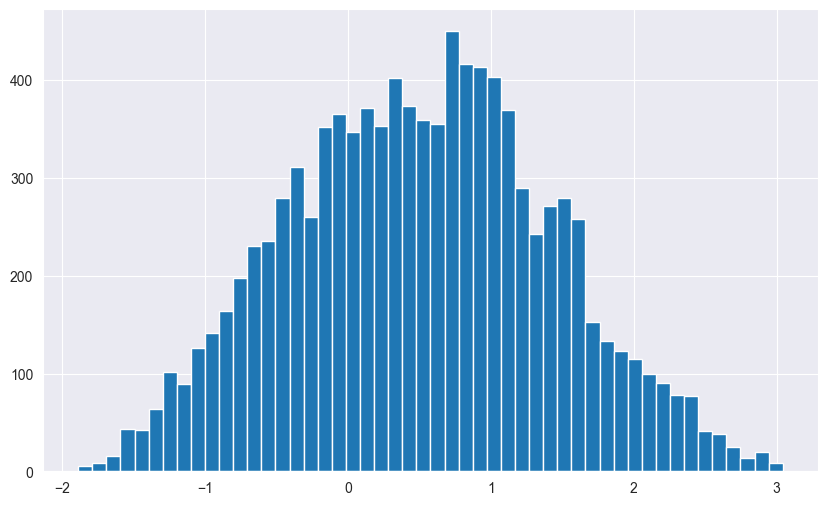

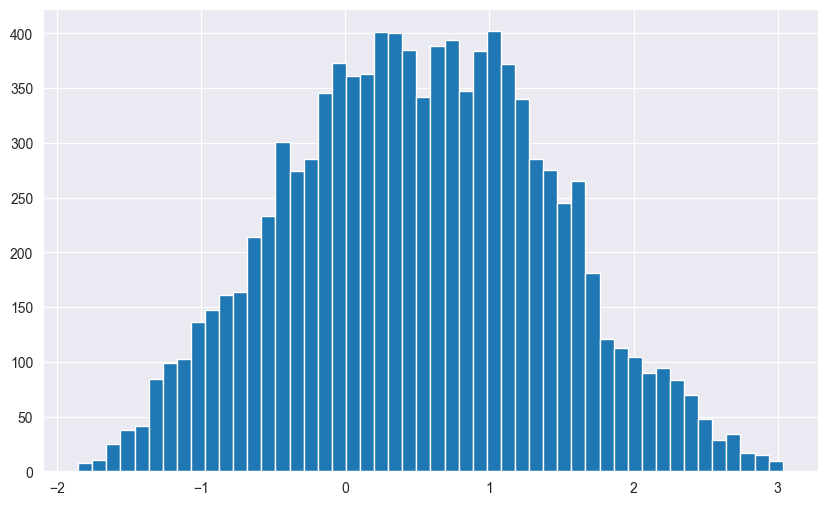

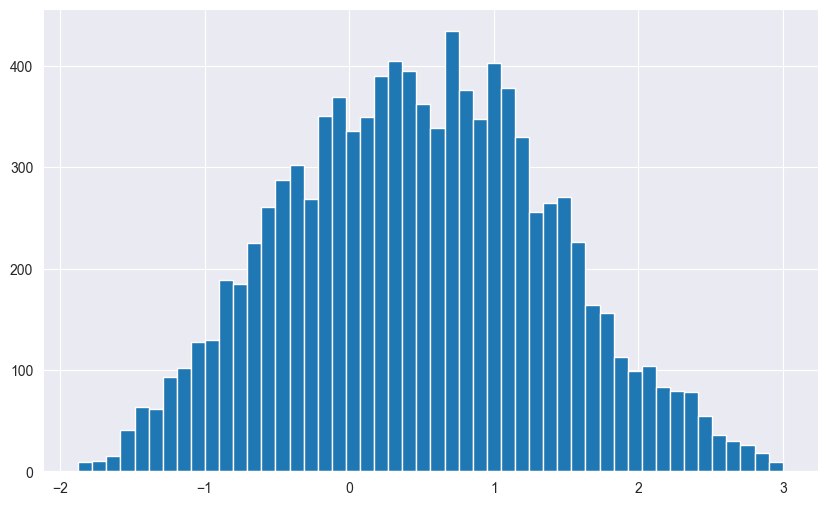

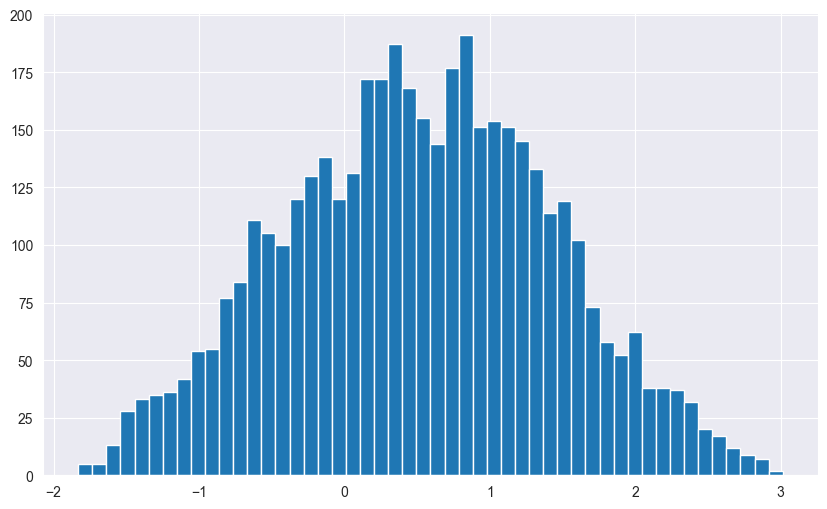

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are large numpy arrays
  # Replace with actual y_pred

# Calculate residuals in a memory-efficient way
residuals = y_test - y_pred_rf  # Ensure y_test and y_pred are 1D arrays, not 2D

# Plotting in smaller batches to avoid large memory allocations
batch_size = 10000  # Adjust batch size as necessary
for i in range(0, len(residuals), batch_size):
    plt.figure(figsize=(10, 6))
    plt.hist(residuals[i:i + batch_size], bins=50)
    plt.show()


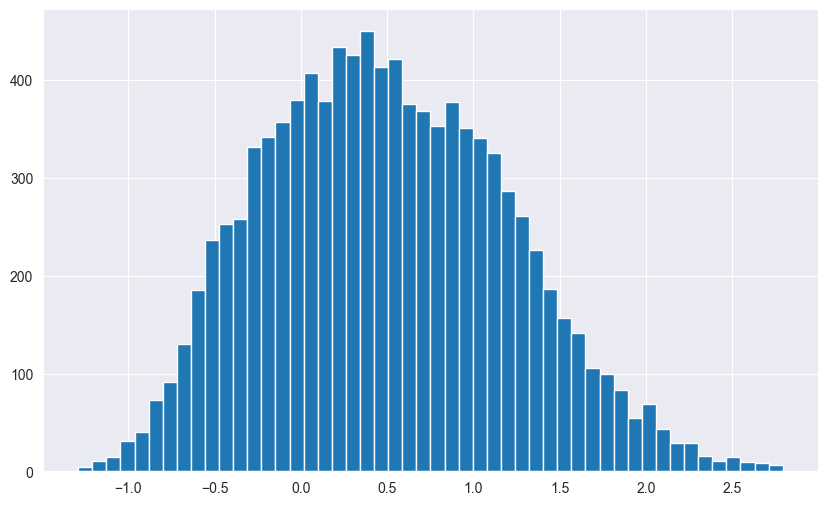

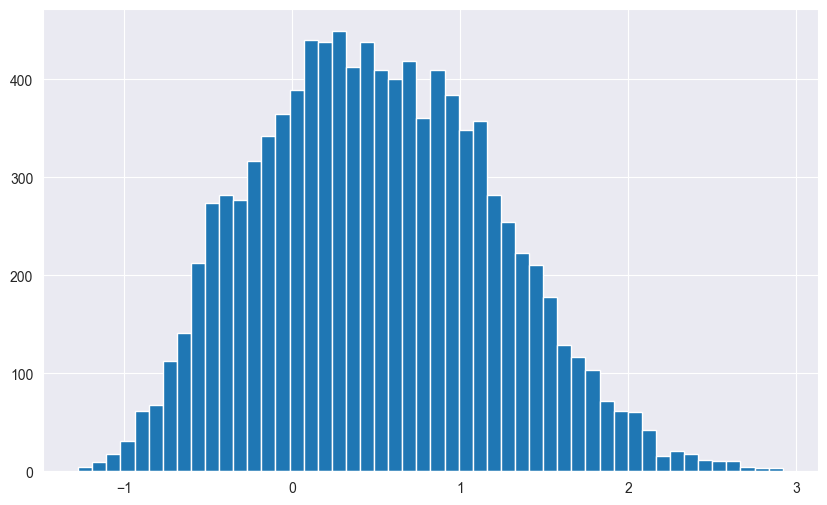

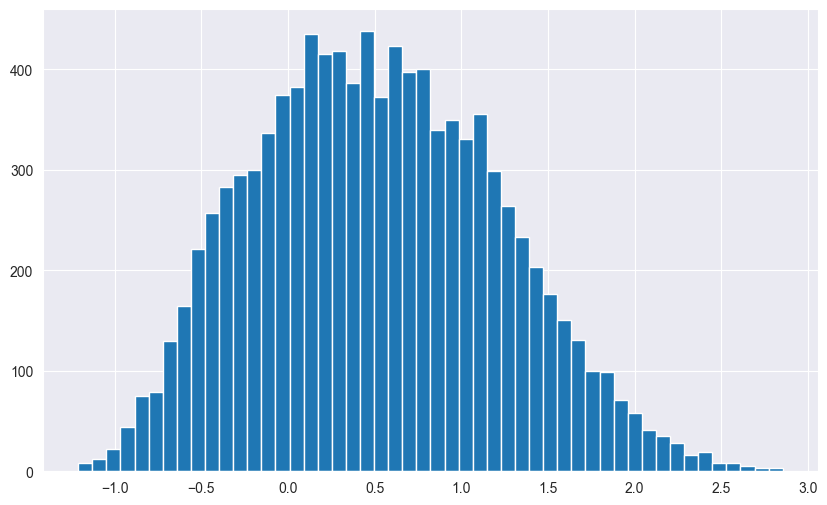

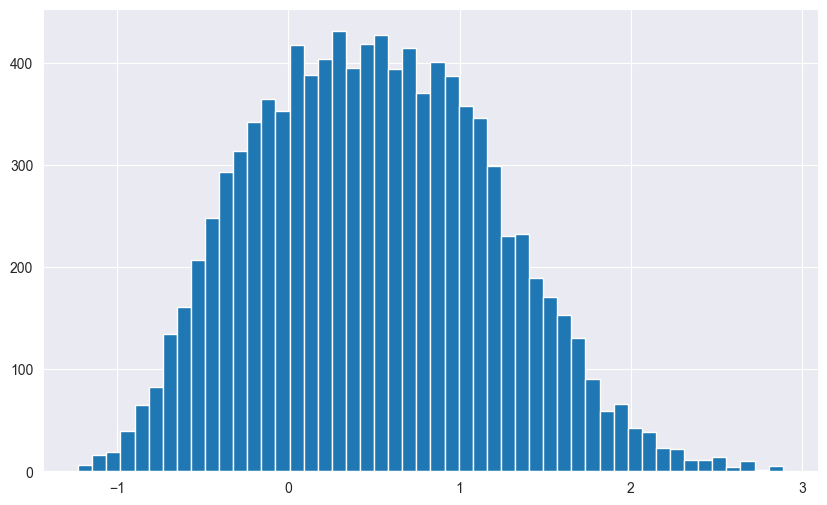

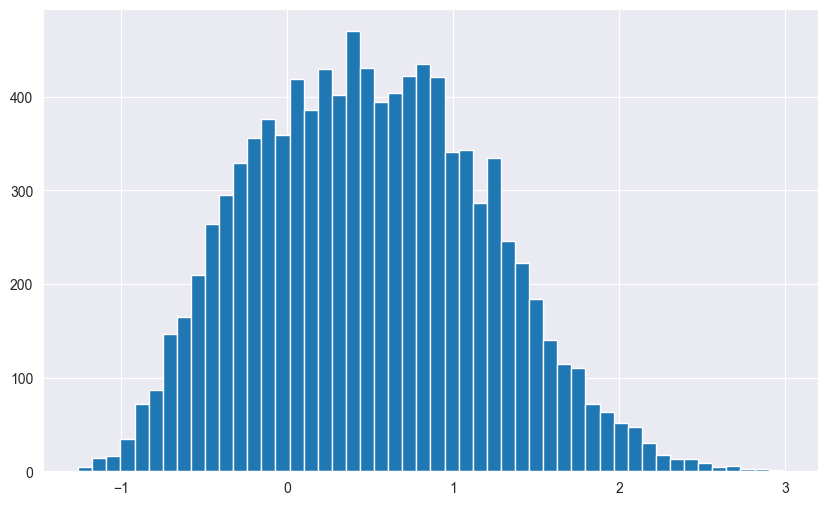

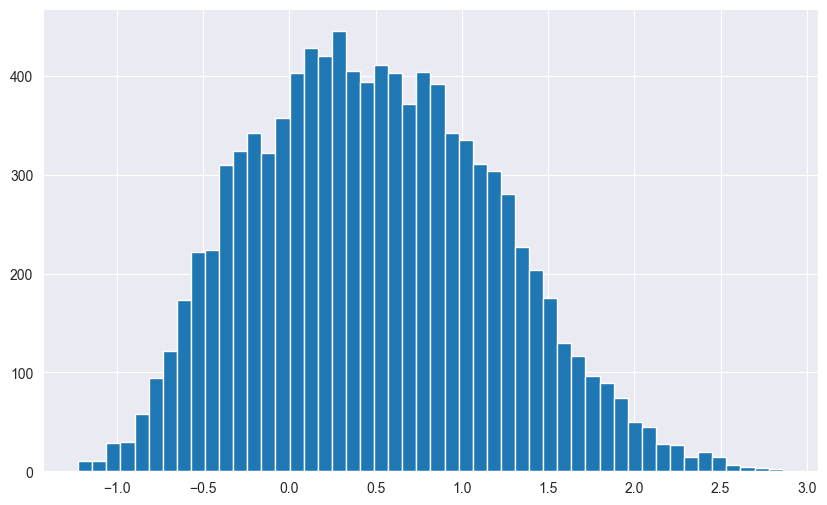

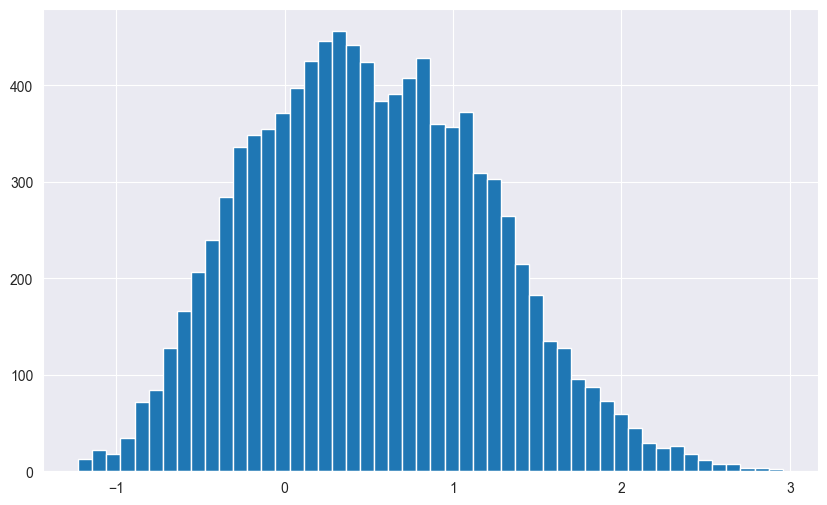

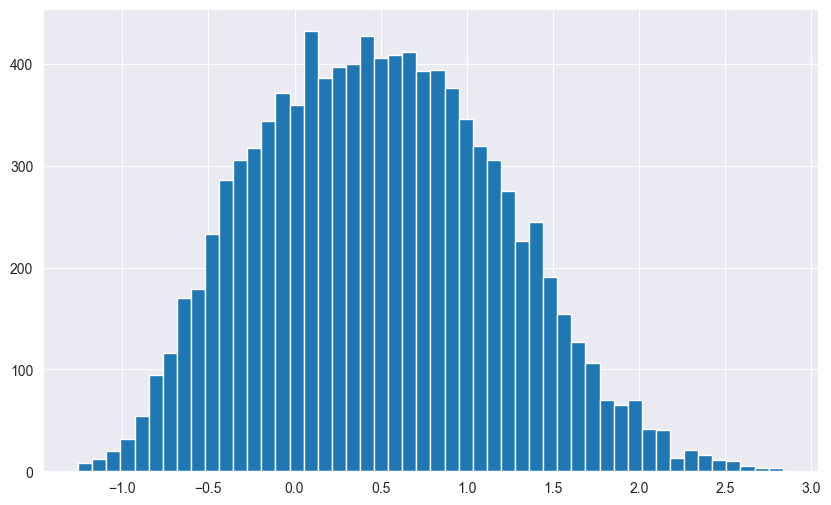

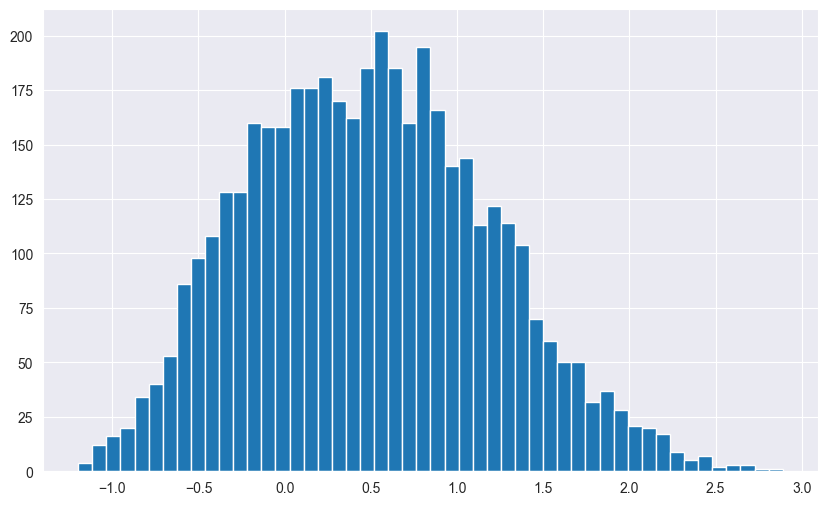

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are large numpy arrays
  # Replace with actual y_pred

# Calculate residuals in a memory-efficient way
residuals = y_test - y_pred_lstm  # Ensure y_test and y_pred are 1D arrays, not 2D

# Plotting in smaller batches to avoid large memory allocations
batch_size = 10000  # Adjust batch size as necessary
for i in range(0, len(residuals), batch_size):
    plt.figure(figsize=(10, 6))
    plt.hist(residuals[i:i + batch_size], bins=50)
    plt.show()

In [19]:
# Mevcut tarih özelliklerini kullanarak yeni özellikler
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Yeni özelliklerle veri setini yeniden ayırma
X = data.drop(['Weekly_Sales_Log_Standardized', 'Date'], axis=1)  # 'Date' sütununu çıkarıyoruz
y = data['Weekly_Sales_Log_Standardized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from tensorflow.keras.layers import Bidirectional

# Bidirectional LSTM Modeli
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Modeli derleme
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Performans değerlendirme
y_pred_bilstm = model.predict(X_test)
print("Bidirectional LSTM Model Performansı:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bilstm))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bilstm))
print("R-squared:", r2_score(y_test, y_pred_bilstm))


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 68s 21ms/step - loss: 0.8226 - val_loss: 0.6992
Epoch 2/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.7044 - val_loss: 0.6641
Epoch 3/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - loss: 0.6631 - val_loss: 0.6006
Epoch 4/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.6082 - val_loss: 0.5564
Epoch 5/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.5756 - val_loss: 0.5414
Epoch 6/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - loss: 0.5538 - val_loss: 0.5194
Epoch 7/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - loss: 0.5353 - val_loss: 0.5080
Epoch 8/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 0.5245 - val_loss: 0.4897
Epoch 9/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.5049 - val_loss: 0.4806
Epoch 10/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - loss: 0.4996 - val_loss: 0.4727
Epoch 11/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - loss: 0.4887 - val_loss: 0.4527
Epoch 12

Ensemble Model Performansı:
Mean Absolute Error: 0.5841432350875788
Mean Squared Error: 0.5394885672397036
R-squared: 0.4081149262513942


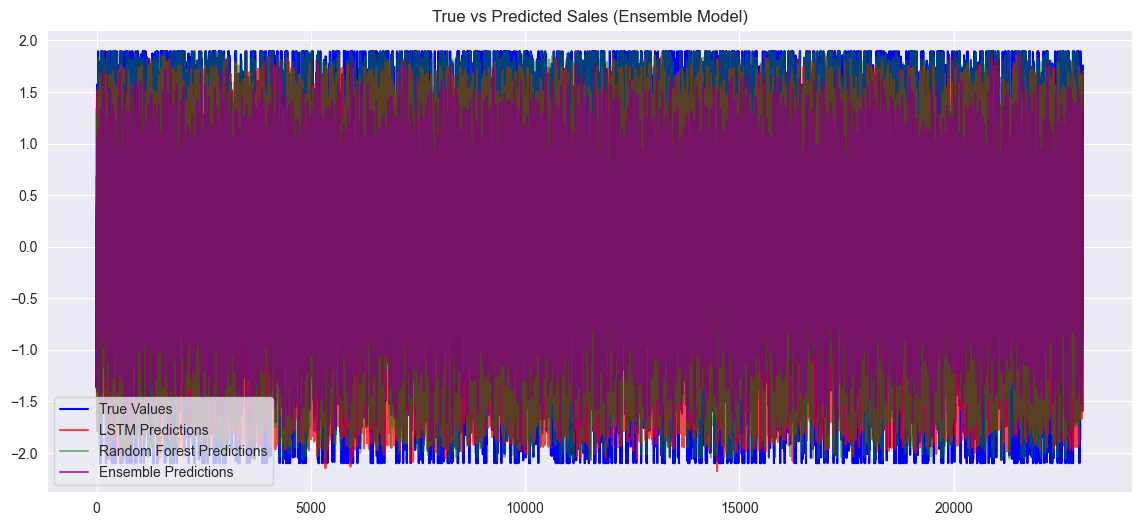

In [23]:
# LSTM tahminleri ve başka bir modelin (örneğin Random Forest) tahminleriyle ensemble
y_pred_rf = rf_model.predict(X_test)  # Mevcut RandomForest modeli
y_pred_lstm_new = y_pred_lstm_new.flatten()

# Tahminlerin uzunluklarını eşitleme
min_len = min(len(y_pred_lstm_new), len(y_pred_rf))
y_pred_lstm_new = y_pred_lstm_new[:min_len]
y_pred_rf = y_pred_rf[:min_len]
y_test_aligned = y_test[:min_len]

# Ensemble (Basit Ortalama) Tahminleri
y_pred_ensemble = (y_pred_lstm_new + y_pred_rf) / 2

# Performans değerlendirme
print("Ensemble Model Performansı:")
print("Mean Absolute Error:", mean_absolute_error(y_test_aligned, y_pred_ensemble))
print("Mean Squared Error:", mean_squared_error(y_test_aligned, y_pred_ensemble))
print("R-squared:", r2_score(y_test_aligned, y_pred_ensemble))

# Sonuçları görselleştirme
plt.figure(figsize=(14, 6))
plt.plot(y_test_aligned.values, label="True Values", color="blue")
plt.plot(y_pred_lstm_new, label="LSTM Predictions", color="red", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest Predictions", color="green", alpha=0.5)
plt.plot(y_pred_ensemble, label="Ensemble Predictions", color="purple", alpha=0.7)
plt.legend()
plt.title("True vs Predicted Sales (Ensemble Model)")
plt.show()


In [25]:
# Gerekli kütüphanelerin ithalatı
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])

y_pred_bilstm = model.predict(X_test)
print("Bidirectional LSTM Model Performansı:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bilstm))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bilstm))
print("R-squared:", r2_score(y_test, y_pred_bilstm))


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - loss: 0.8241 - val_loss: 0.6969 - learning_rate: 0.0010
Epoch 2/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 0.7044 - val_loss: 0.6683 - learning_rate: 0.0010
Epoch 3/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.6843 - val_loss: 0.6208 - learning_rate: 0.0010
Epoch 4/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.6238 - val_loss: 0.5747 - learning_rate: 0.0010
Epoch 5/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.5706 - val_loss: 0.5431 - learning_rate: 0.0010
Epoch 6/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.5504 - val_loss: 0.5229 - learning_rate: 0.0010
Epoch 7/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.5396 - val_loss: 0.5082 - learning_rate: 0.0010
Epoch 8/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.5297 - val_loss: 0.5022 - learning_rate: 0.0010
Epoch 9/20
2877/2877 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.5161 - val_loss: 0.4877 - lea

Epoch 1/10


C:\Users\egeme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4603/4603 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - loss: 0.8171 - val_loss: 0.7264
Epoch 2/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.7013 - val_loss: 0.6797
Epoch 3/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.6631 - val_loss: 0.5915
Epoch 4/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.5987 - val_loss: 0.5526
Epoch 5/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.5620 - val_loss: 0.5231
Epoch 6/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.5384 - val_loss: 0.5242
Epoch 7/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.5286 - val_loss: 0.5014
Epoch 8/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - loss: 0.5128 - val_loss: 0.4874
Epoch 9/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.5014 - val_loss: 0.4629
Epoch 10/10
4603/4603 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - loss: 0.4853 - val_loss: 0.4403
720/720 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Bidirectional LSTM Model Performance:
Mean Absolute Error: 0.5088422787767463
M

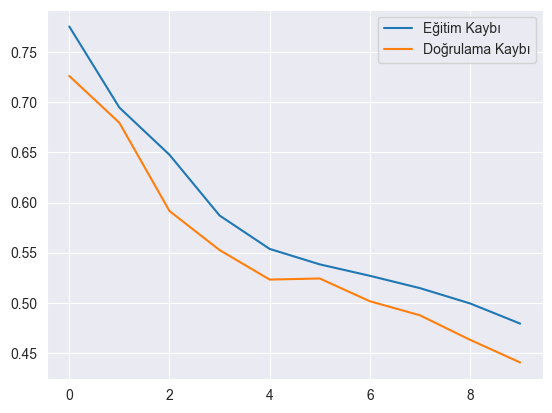

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt


# Define the model creation function
def create_model(optimizer='adam', dropout_rate=0.2, units=50):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(None, 1)))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(LSTM(units=units, return_sequences=False)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model


# Assuming X and y are already defined elsewhere in the code
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Model parameters derived from your previous best results
build_fn_kwargs = {
    'optimizer': 'adam',
    'dropout_rate': 0.2,
    'units': 50
}
batch_size = 16
epochs = 10

# Create and train the model
model = create_model(**build_fn_kwargs)
history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

# Predictions and evaluation
y_pred_bilstm = model.predict(X_test_scaled)

# Evaluate model performance
print("Bidirectional LSTM Model Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bilstm))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bilstm))
print("R-squared:", r2_score(y_test, y_pred_bilstm))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Eğitim Kaybı')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.legend()
plt.show()

